<a href="https://colab.research.google.com/github/WattEfird4/Projects/blob/main/Data_Analysis_Automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('spark').getOrCreate()
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col,isnan,when,count

In [ ]:
"""
Data Cleaning & Feature Engineering Pipeline
--------------------------------------------
This script automates data preprocessing using Pandas, NumPy, and Scikit-learn.

📌 INSTRUCTIONS:
1. Place your raw CSV file in the same directory or provide the full path.
2. Replace the 'your_data.csv' string below with your actual filename or path.
3. Run the script using: python data_cleaning_pipeline.py
"""

import pandas as pd
import numpy as np # Added back numpy import
import matplotlib.pyplot as plt
import seaborn as sns
# from pyspark.sql import SparkSession # Removed PySpark dependency
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy.stats import zscore
import os

# Removed Spark initialization function
# def initialize_spark():
#     return SparkSession.builder.appName("DataCleaningPipeline").getOrCreate()

def load_data(path): # Modified to use Pandas directly
    print(f"📂 Loading data from: {path}")
    # Removed Spark data loading and conversion
    # df_spark = spark.read.csv(path, header=True, inferSchema=True)
    # return df_spark.toPandas()
    return pd.read_csv(path)


def impute_missing_values(df):
    for col in df.columns:
        if df[col].dtype in [np.float64, np.int64]:
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            # Check if the mode is empty before accessing the first element
            mode_val = df[col].mode()
            if not mode_val.empty:
                df[col].fillna(mode_val[0], inplace=True)
            else:
                # Handle cases where mode is empty (e.g., all NaN)
                print(f"Warning: Mode is empty for column '{col}'. Cannot impute with mode.")
    return df


def remove_outliers(df, numeric_cols):
    z_scores = np.abs(zscore(df[numeric_cols]))
    return df[(z_scores < 3).all(axis=1)]

def standardize_data(df, numeric_cols):
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    return df

def generate_plots(df, numeric_cols, categorical_cols, output_dir="plots"):
    os.makedirs(output_dir, exist_ok=True)
    for col in numeric_cols:
        plt.figure()
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.savefig(f"{output_dir}/{col}_dist.png")
        plt.close()
    for col in categorical_cols:
        plt.figure()
        df[col].value_counts().plot(kind="bar")
        plt.title(f"Count of {col}")
        plt.savefig(f"{output_dir}/{col}_bar.png")
        plt.close()
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.savefig(f"{output_dir}/heatmap.png")
    plt.close()

def export_data(df, csv_path="cleaned_data.csv", xlsx_path="cleaned_data.xlsx"):
    df.to_csv(csv_path, index=False)
    df.to_excel(xlsx_path, index=False)

def suggest_features(df):
    suggestions = []
    for col in df.columns:
        if df[col].dtype == "object":
            suggestions.append(f"- {col}: Consider one-hot or frequency encoding.")
        elif df[col].nunique() < 10 and df[col].dtype != "object": # Added check for non-object dtype
            suggestions.append(f"- {col}: Treat as categorical; try binning or ordinal encoding.")
        else:
            suggestions.append(f"- {col}: Use as continuous; consider polynomial or interaction features.")
    return suggestions

def optional_feature_engineering(df, numeric_cols):
    """
    Uncomment one or more of the following blocks to apply feature engineering.
    """

    # --- Polynomial Features Example ---
    # poly = PolynomialFeatures(degree=2, include_bias=False)
    # poly_features = poly.fit_transform(df[numeric_cols])
    # poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(numeric_cols))
    # df = pd.concat([df.reset_index(drop=True), poly_df], axis=1)

    # --- Binning Example ---
    # for col in numeric_cols:
    #     df[f"{col}_binned"] = pd.cut(df[col], bins=4, labels=False)

    # --- Interaction Terms Example ---
    # df["interaction_term"] = df[numeric_cols[0]] * df[numeric_cols[1]]

    return df

def main():
    # Removed Spark initialization
    # spark = initialize_spark()
    df = load_data("/content/drive/MyDrive/Regression/boston.csv")  # Modified to use Pandas load_data
    df = impute_missing_values(df)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(include=["object"]).columns
    df = remove_outliers(df, numeric_cols)
    df = standardize_data(df, numeric_cols)
    generate_plots(df, numeric_cols, categorical_cols)
    df = optional_feature_engineering(df, numeric_cols)
    export_data(df)
    suggestions = suggest_features(df)
    with open("feature_engineering_suggestions.txt", "w") as f:
        f.write("💡 Feature Engineering Suggestions:\n")
        f.write("\n".join(suggestions))
    print("✅ Pipeline complete. Clean files and plots saved.")

if __name__ == "__main__":
    main()

📂 Loading data from: /content/drive/MyDrive/Regression/boston.csv
✅ Pipeline complete. Clean files and plots saved.


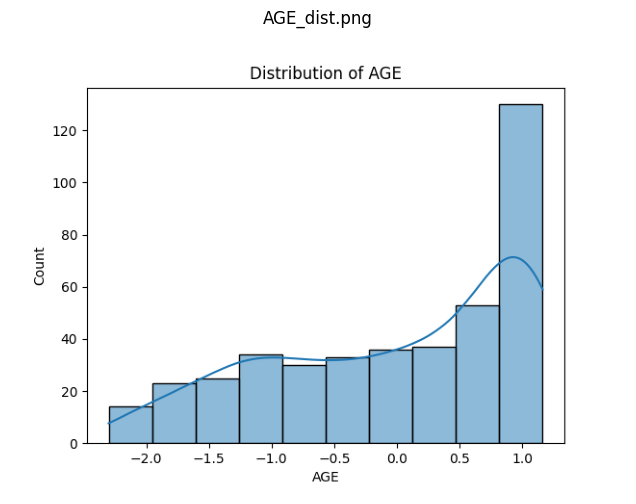

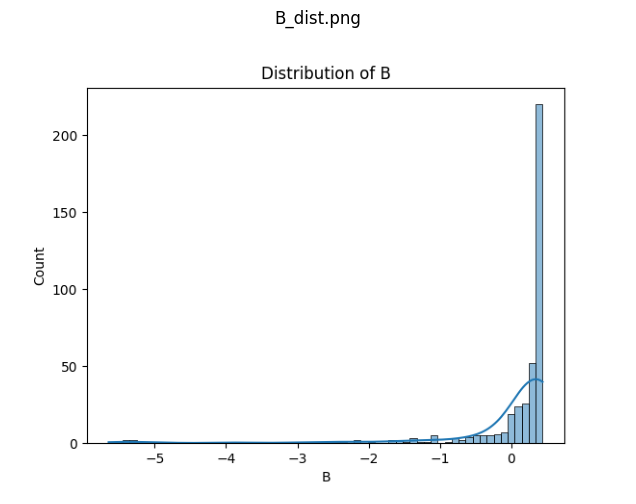

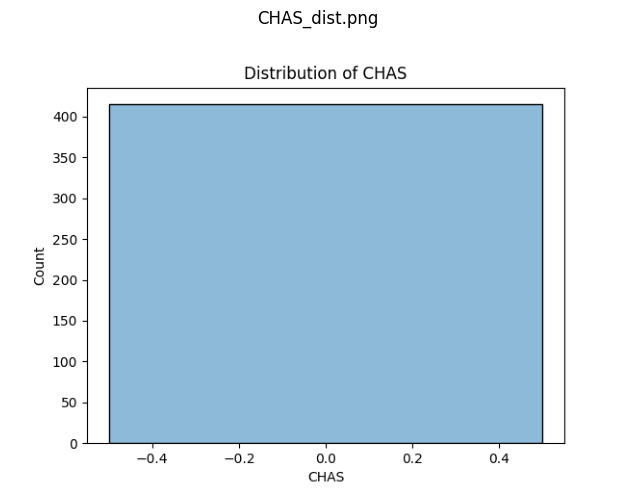

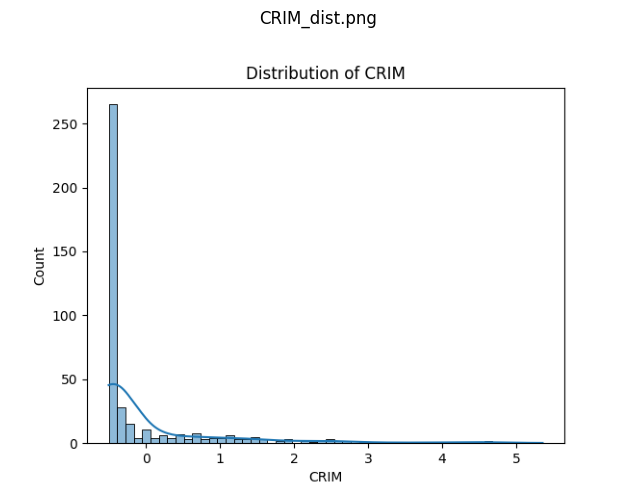

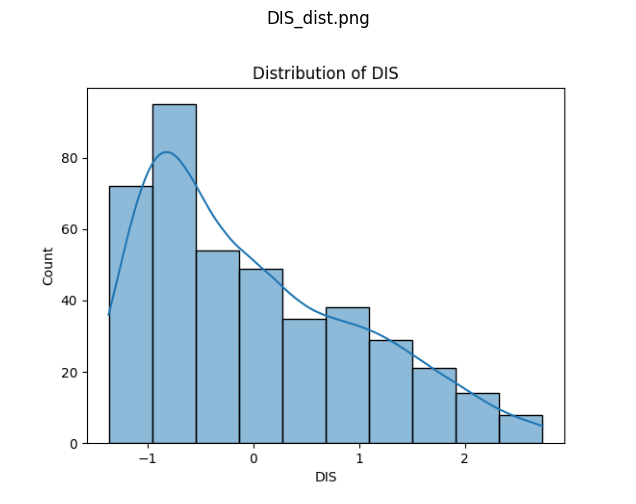

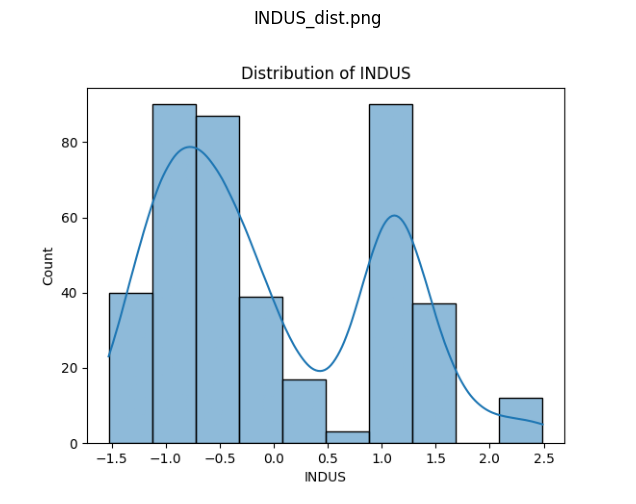

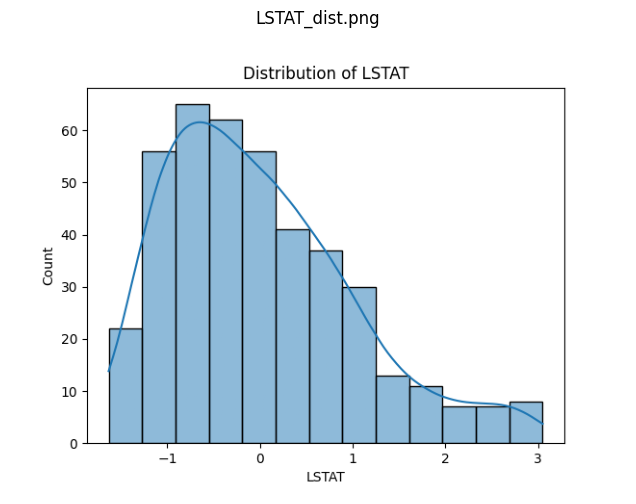

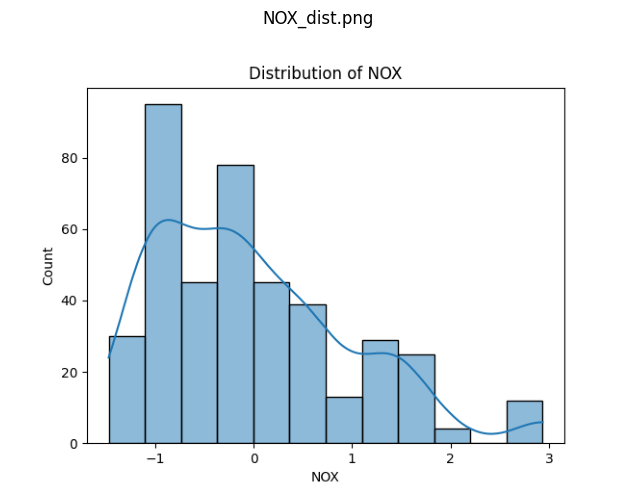

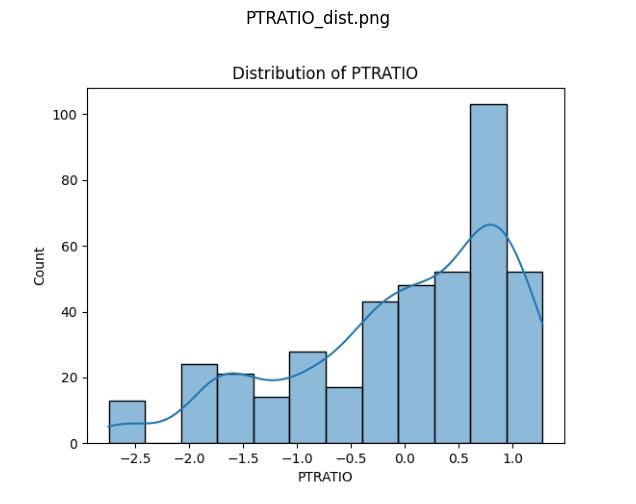

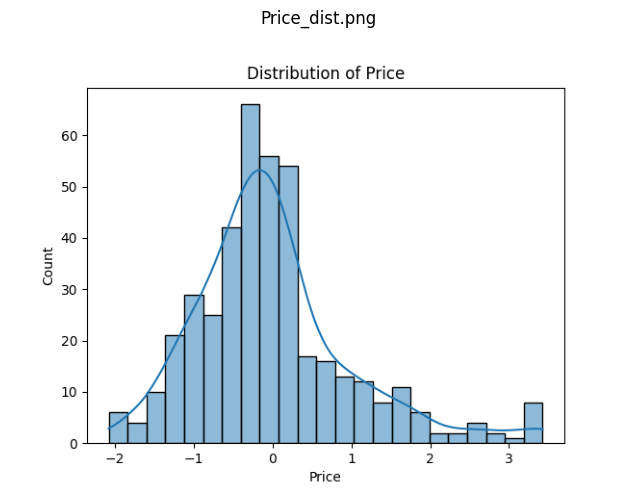

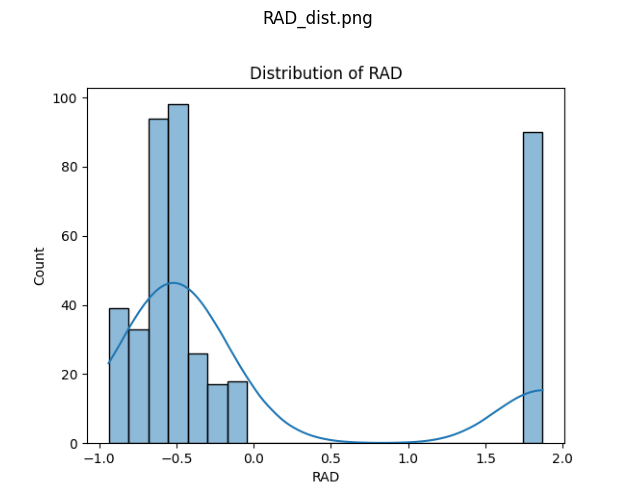

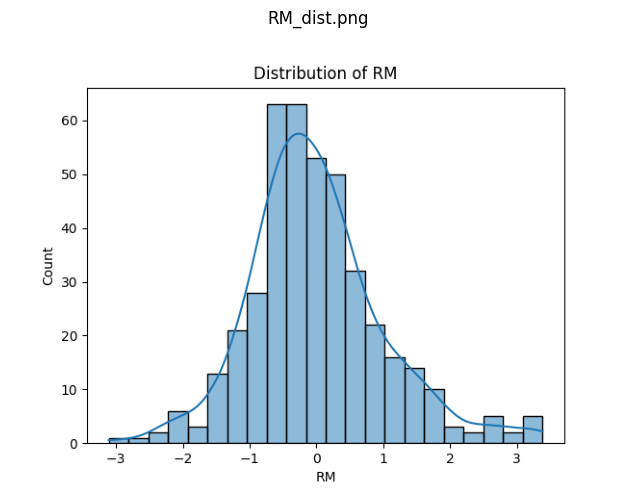

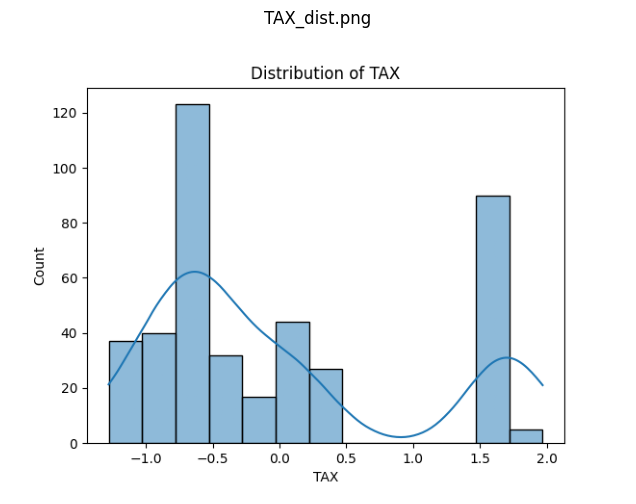

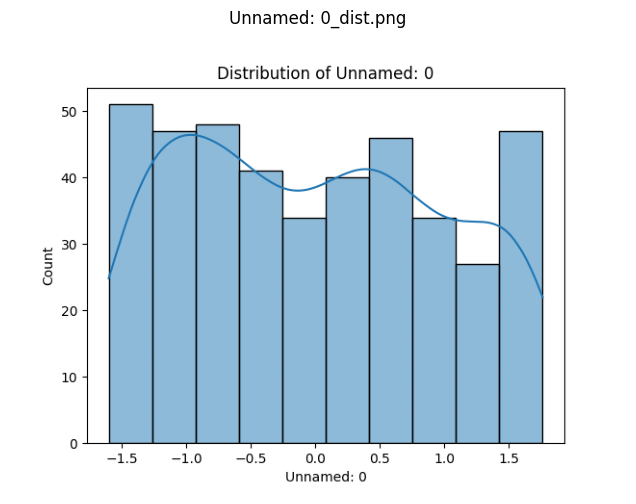

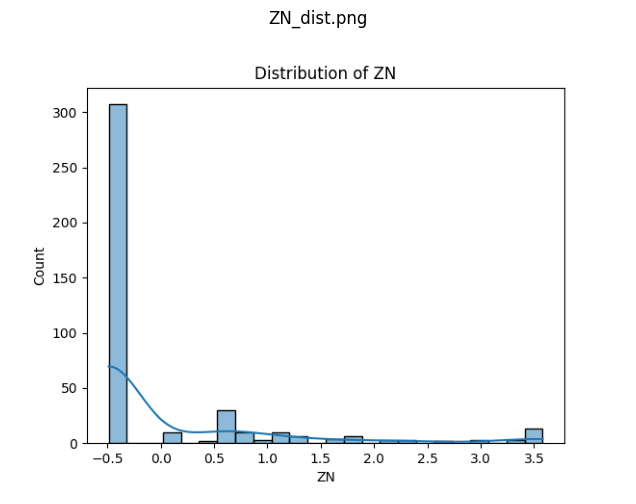

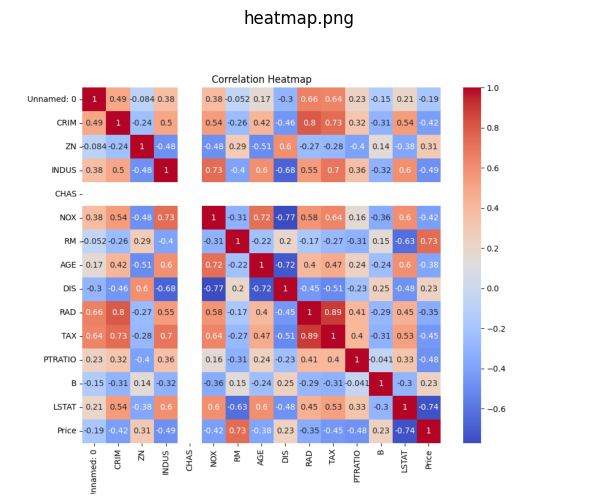

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

plot_dir = "plots"
plot_files = [f for f in os.listdir(plot_dir) if f.endswith(".png")]
plot_files.sort() # Display plots in a consistent order

for plot_file in plot_files:
    img_path = os.path.join(plot_dir, plot_file)
    img = mpimg.imread(img_path)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(plot_file)
    plt.axis('off') # Hide axes
    plt.show()

In [ ]:
"""
Data Cleaning & Feature Engineering Pipeline
--------------------------------------------
This script automates data preprocessing using PySpark, Pandas, NumPy, and Scikit-learn.

📌 INSTRUCTIONS:
1. Place your raw CSV file in the same directory or provide the full path.
2. Replace the 'your_data.csv' string below with your actual filename or path.
3. Run the script using: python data_cleaning_pipeline.py
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy.stats import zscore
import os

def initialize_spark():
    return SparkSession.builder.appName("DataCleaningPipeline").getOrCreate()

def load_data(spark, path):
    print(f"📂 Loading data from: {path}")
    df_spark = spark.read.csv(path, header=True, inferSchema=True)
    return df_spark.toPandas()

def impute_missing_values(df):
    for col in df.columns:
        if df[col].dtype in [np.float64, np.int64]:
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
    return df

def remove_outliers(df, numeric_cols):
    z_scores = np.abs(zscore(df[numeric_cols]))
    return df[(z_scores < 3).all(axis=1)]

def standardize_data(df, numeric_cols):
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    return df

def generate_plots(df, numeric_cols, categorical_cols, output_dir="plots"):
    os.makedirs(output_dir, exist_ok=True)
    for col in numeric_cols:
        plt.figure()
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.savefig(f"{output_dir}/{col}_dist.png")
        plt.close()
    for col in categorical_cols:
        plt.figure()
        df[col].value_counts().plot(kind="bar")
        plt.title(f"Count of {col}")
        plt.savefig(f"{output_dir}/{col}_bar.png")
        plt.close()
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.savefig(f"{output_dir}/heatmap.png")
    plt.close()

def export_data(df, csv_path="cleaned_data.csv", xlsx_path="cleaned_data.xlsx"):
    df.to_csv(csv_path, index=False)
    df.to_excel(xlsx_path, index=False)

def suggest_features(df):
    suggestions = []
    for col in df.columns:
        if df[col].dtype == "object":
            suggestions.append(f"- {col}: Consider one-hot or frequency encoding.")
        elif df[col].nunique() < 10:
            suggestions.append(f"- {col}: Treat as categorical; try binning or ordinal encoding.")
        else:
            suggestions.append(f"- {col}: Use as continuous; consider polynomial or interaction features.")
    return suggestions

def optional_feature_engineering(df, numeric_cols):
    """
    Uncomment one or more of the following blocks to apply feature engineering.
    """

    # --- Polynomial Features Example ---
    # poly = PolynomialFeatures(degree=2, include_bias=False)
    # poly_features = poly.fit_transform(df[numeric_cols])
    # poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(numeric_cols))
    # df = pd.concat([df.reset_index(drop=True), poly_df], axis=1)

    # --- Binning Example ---
    # for col in numeric_cols:
    #     df[f"{col}_binned"] = pd.cut(df[col], bins=4, labels=False)

    # --- Interaction Terms Example ---
    # df["interaction_term"] = df[numeric_cols[0]] * df[numeric_cols[1]]

    return df

def main():
    spark = initialize_spark()
    df = load_data(spark, "your_data.csv")  # 🔁 Replace with your actual file path
    df = impute_missing_values(df)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(include=["object"]).columns
    df = remove_outliers(df, numeric_cols)
    df = standardize_data(df, numeric_cols)
    generate_plots(df, numeric_cols, categorical_cols)
    df = optional_feature_engineering(df, numeric_cols)
    export_data(df)
    suggestions = suggest_features(df)
    with open("feature_engineering_suggestions.txt", "w") as f:
        f.write("💡 Feature Engineering Suggestions:\n")
        f.write("\n".join(suggestions))
    print("✅ Pipeline complete. Clean files and plots saved.")

if __name__ == "__main__":
    main()
